In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r'C:\Users\muhammadsaif\OneDrive\Desktop\Oasis-Infobyte\Task 5\archive\Advertising.csv')

df = df.drop('Unnamed: 0', axis=1)

print("Dataset Columns:", df.columns.tolist())

print("\nDataset Info:")
print(df.info())

df.head()

Dataset Columns: ['TV', 'Radio', 'Newspaper', 'Sales']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())

numerical_cols = ['TV', 'Radio', 'Newspaper', 'Sales']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in numerical_cols:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].replace(r'[^0-9.]', '', regex=True), errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)

print("\nData Types After Cleaning:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data Types After Cleaning:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\muhammadsaif\AppData\Local\Temp\ipykernel_12780\1393872567.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


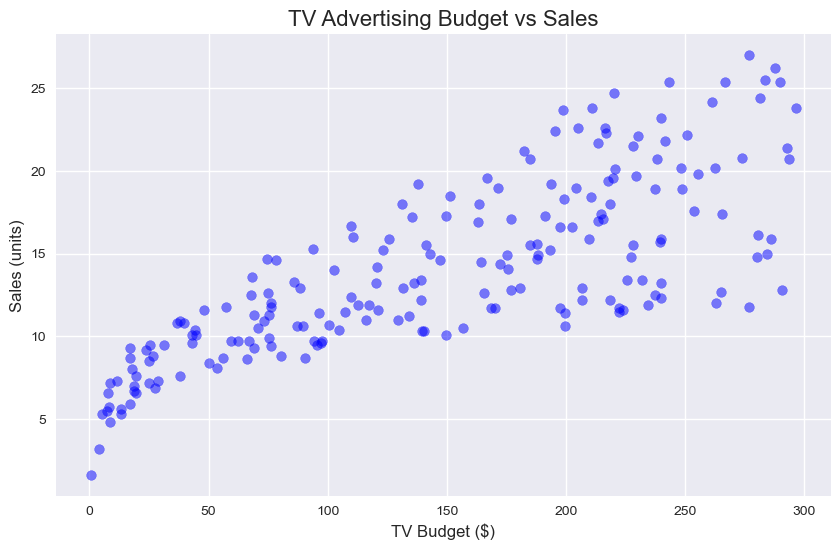

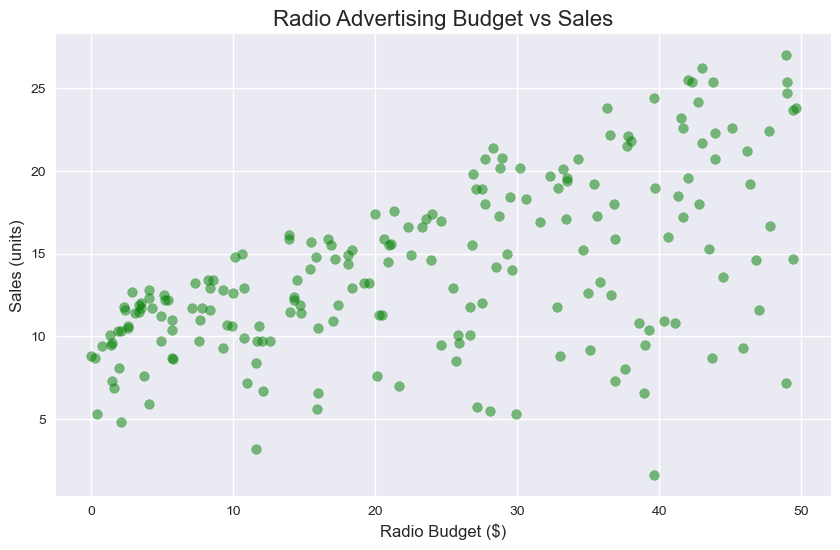

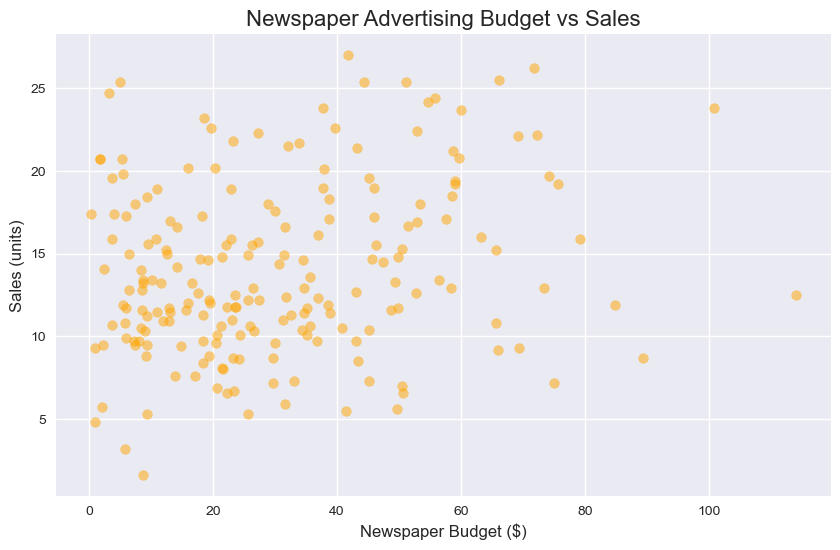

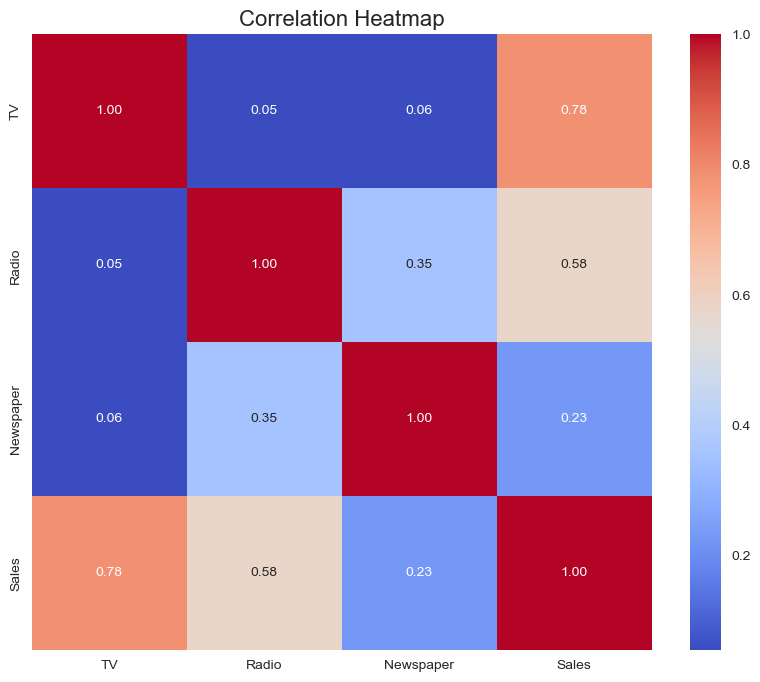

In [5]:
plt.style.use('seaborn')

plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.5)
plt.title('TV Advertising Budget vs Sales', fontsize=16)
plt.xlabel('TV Budget ($)', fontsize=12)
plt.ylabel('Sales (units)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Radio'], df['Sales'], color='green', alpha=0.5)
plt.title('Radio Advertising Budget vs Sales', fontsize=16)
plt.xlabel('Radio Budget ($)', fontsize=12)
plt.ylabel('Sales (units)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['Newspaper'], df['Sales'], color='orange', alpha=0.5)
plt.title('Newspaper Advertising Budget vs Sales', fontsize=16)
plt.xlabel('Newspaper Budget ($)', fontsize=12)
plt.ylabel('Sales (units)', fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Mean Squared Error: 0.59
R² Score: 0.98


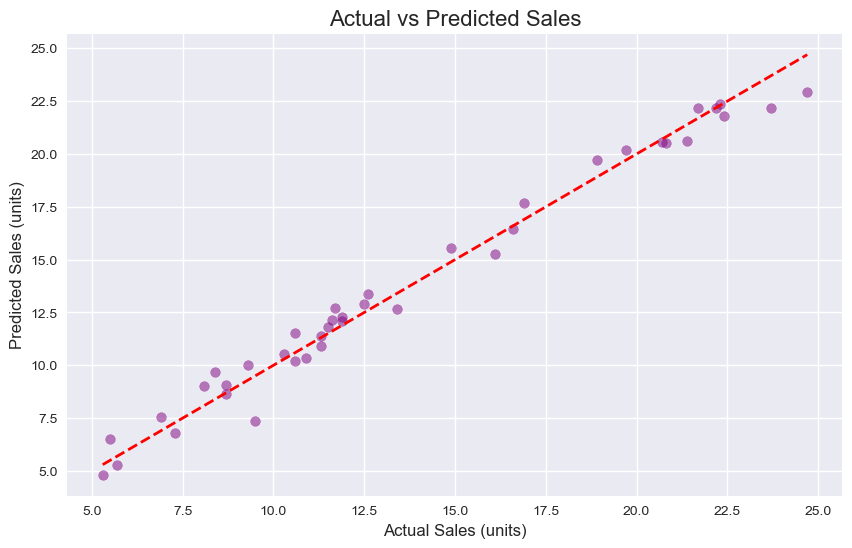

Predicted Sales for the new scenario: 16.68 units


In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales (units)', fontsize=12)
plt.ylabel('Predicted Sales (units)', fontsize=12)
plt.grid(True)
plt.show()

new_scenario = pd.DataFrame({
    'TV': [150],
    'Radio': [30],
    'Newspaper': [20]
})

predicted_sales = model.predict(new_scenario)
print(f"Predicted Sales for the new scenario: {predicted_sales[0]:.2f} units")